<a href="https://colab.research.google.com/github/LilySu/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Lily_Su_Assignment4_LS_DS3_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
persons = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module4-databackedassertions/persons.csv',header=None)
persons.head()

,0,1,2,3
0,NaN,age,weight,exercise_time
1,0.0,44,118,192
2,1.0,41,161,35
3,2.0,46,128,220
4,3.0,39,216,57


In [26]:
persons.describe()

,0
count,1200.000000
mean,599.500000
std,346.554469
min,0.000000
25%,299.750000
50%,599.500000
75%,899.250000
max,1199.000000


1. What are the variable types in the data?


In [39]:
persons.dtypes

0    float64
1     object
2     object
3     object
dtype: object

In [41]:
converted_persons = persons.convert_objects(convert_numeric=True)
converted_persons.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


,0,1,2,3
0,NaN,NaN,NaN,NaN
1,0.0,44.0,118.0,192.0
2,1.0,41.0,161.0,35.0
3,2.0,46.0,128.0,220.0
4,3.0,39.0,216.0,57.0


In [43]:
converted_persons .convert_objects(convert_numeric=True).dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


0    float64
1    float64
2    float64
3    float64
dtype: object

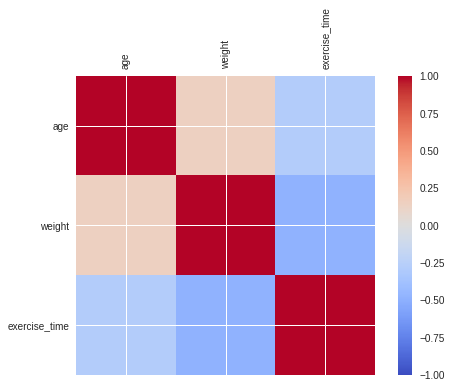

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module4-databackedassertions/persons.csv', index_col=0)
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

2. What are the relationships between the variables?
# Age is correllated with weight as shown above in graph. 

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler


#splitting the dataset into the source variables (independant variables) and the target variable (dependant variable)
data = persons.iloc[:,:-1] #all columns except the last one
target = persons.iloc[:,len(persons.iloc[0])-1] #only the last column
X = data
y = target
#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    

pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

ValueError: ignored

3. Which relationships are "real", and which spurious?